In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import app

data, pred = app.run('F')
test = data.iloc[-1*len(pred):, :]

[2021-05-07 19:44:22] [81552] [data.data_reader] [DEBUG] - Gathering daily stock data for F from 2013-05-09 00:00:00 to 2021-05-07 00:00:00
[2021-05-07 19:44:22] [81552] [data.data_reader] [DEBUG] - Gathering daily stock data for SPY from 2013-05-09 00:00:00 to 2021-05-07 00:00:00
[2021-05-07 19:44:26] [81552] [models.predict] [DEBUG] - Importing Model Parameters...
[2021-05-07 19:44:26] [81552] [models.predict] [DEBUG] - Parameters Loaded: {'n_estimators': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 1}
The Total Predictive Accuracy Is: 74.14248021108179
Sensitivity is 93.87755102040816 % and Specificity is 61.63793103448276 %
[2021-05-07 19:44:26] [81552] [run] [DEBUG] - runtime: 4.7233 sec


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


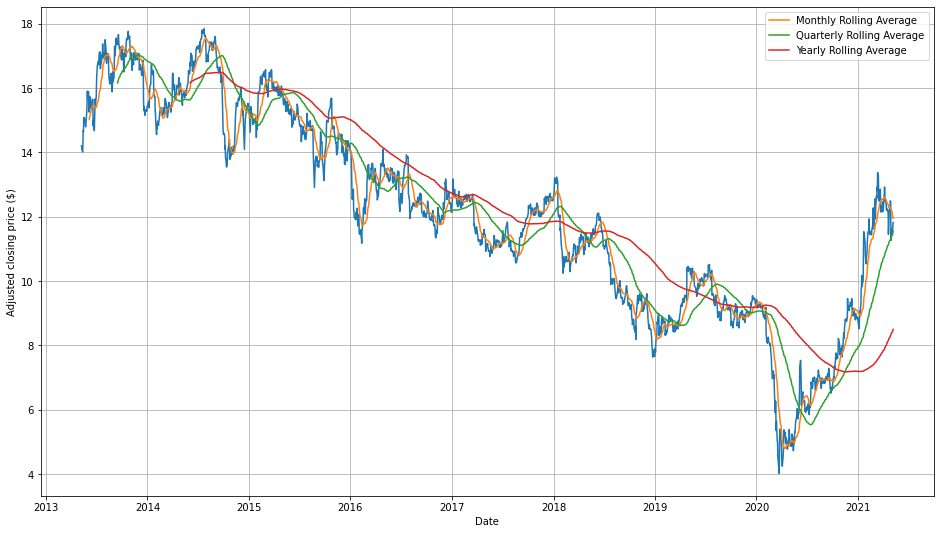

In [2]:
def rolling_average(data):
    tick = data.Close.loc[:,]

    # Calculate the moving averages of the closing prices
    monthly_rolling = tick.rolling(window=20).mean()
    quarter_rolling = tick.rolling(window=90).mean()
    yearly_rolling = tick.rolling(window=270).mean()

    fig, ax = plt.subplots(figsize=(16,9))    

    plt.plot(tick.index, tick)
    plt.plot(monthly_rolling.index, monthly_rolling, label='Monthly Rolling Average')
    plt.plot(quarter_rolling.index, quarter_rolling, label='Quarterly Rolling Average')
    plt.plot(yearly_rolling.index, yearly_rolling, label='Yearly Rolling Average')

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')
    ax.legend()
    plt.rc('grid',linestyle='dashdot')
    plt.grid()  

rolling_average(data)


No handles with labels found to put in legend.


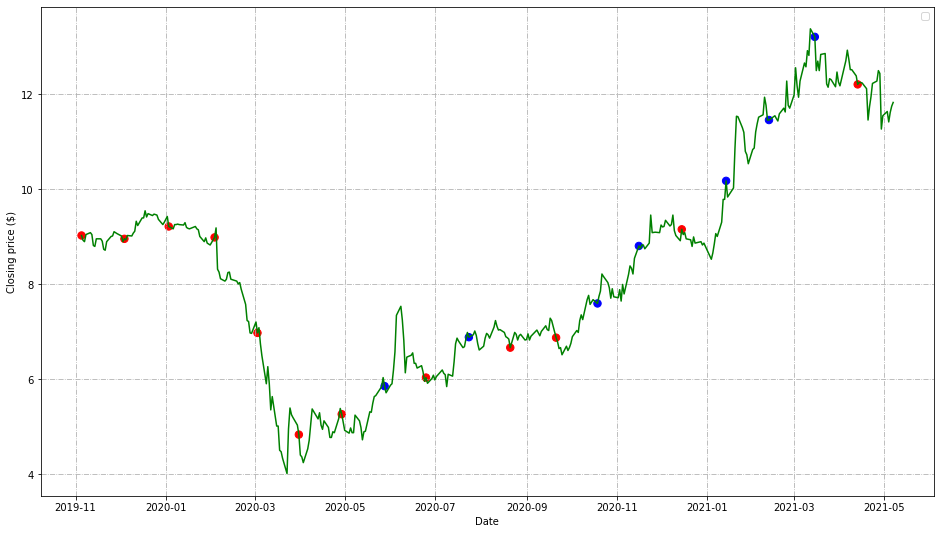

1

In [3]:
def trading_strategy(pred, equity):
    #x and y coords appropriately
    x = [equity.index[i] for i in range(0,len(equity),20)]
    y = [equity.Close[i] for i in range(0,len(equity),20)]
    y_pred = [pred[i] for i in range(0,len(pred),20)]
    #Color Mapping
    colorMap = {-1.0:"r",1.0:"b",0.0:"y"}
    c = [colorMap[y_pred[i]] for i in range(len(y_pred))]
    #c.append('r')

    #Setting up plot and Closing Prices
    fig, ax = plt.subplots(figsize=(16,9))
    plt.plot()
    plt.plot(equity.Close, c = "g")

    #Scatter
    plt.scatter(x,y, c=c, s=55)

    #Labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing price ($)')
    ax.legend()
    plt.rc('grid',linestyle='dashdot')
    plt.grid()  
    plt.show()
    return 1

trading_strategy(pred, test)